In [1]:
import  plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib

In [2]:
data=pd.read_csv("C:/Users/mahia/Downloads/shopping_behavior_updated (1).csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
data.shape

(3900, 18)

In [8]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [9]:
data.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [10]:
data.drop(columns={'Customer ID'},inplace=True)

In [11]:
data.sample(5)

Age  Gender Item Purchased     Category  Purchase Amount (USD)  \
3712   51  Female         Blouse     Clothing                     72   
2206   46    Male        Sandals     Footwear                     51   
2520   64    Male         Jacket    Outerwear                     56   
3514   25  Female       Sneakers     Footwear                     50   
836    23    Male         Gloves  Accessories                     90   

           Location Size      Color  Season  Review Rating  \
3712         Oregon    M  Turquoise  Spring            3.7   
2206       Illinois    L      Green  Spring            2.6   
2520       Illinois    L    Magenta  Summer            3.1   
3514        Georgia   XL       Gray  Winter            4.7   
836   West Virginia    L     Violet  Winter            3.9   

     Subscription Status   Shipping Type Discount Applied Promo Code Used  \
3712                  No  2-Day Shipping               No              No   
2206                  No    Store Pickup               No              No   
2520                  No    Next Day Air               No              No   
3514                  No         Express               No              No   
836                  Yes    Store Pickup              Yes             Yes   

      Previous Purchases Payment Method Frequency of Purchases  
3712                  24         PayPal              Quarterly  
2206                  25  Bank Transfer            Fortnightly  
2520                  16           Cash         Every 3 Months  
3514                  32           Cash                Monthly  
836                   22           Cash              Bi-Weekly

In [12]:
#Finding Numerical Columns
num_col=[]
for col in data.columns:
    if(data[col].dtypes!='object'):
        num_col.append(col)
print(f"There are total {len(num_col)} numerical columns in dataset")
print(num_col)

There are total 4 numerical columns in dataset
['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


In [13]:
#Finding Categorical Columns
cat_col=[]
for col  in data.columns:
    if(data[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} categorical columns in dataset")
print(cat_col)

There are total 13 categorical columns in dataset
['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']


In [14]:
data.isnull().mean()*100

Age                       0.0
Gender                    0.0
Item Purchased            0.0
Category                  0.0
Purchase Amount (USD)     0.0
Location                  0.0
Size                      0.0
Color                     0.0
Season                    0.0
Review Rating             0.0
Subscription Status       0.0
Shipping Type             0.0
Discount Applied          0.0
Promo Code Used           0.0
Previous Purchases        0.0
Payment Method            0.0
Frequency of Purchases    0.0
dtype: float64

In [15]:
data.duplicated().sum()

0

In [16]:
def uni_cat(col):
    index=data[col].value_counts().index
    value=data[col].value_counts().values

 #Bar Plot

    fig=px.bar(x=index,y=value,pattern_shape=index,text_auto=index,color=index,title=f'Count Plot of {col}')
    fig.update_layout(paper_bgcolor='#FFD450',plot_bgcolor='#40403C',height=400)
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()
#Pie Plot
    fig=px.pie(names=index,values=value,height=400)
    fig.update_layout(paper_bgcolor='#FFD450',title=f'Relative Count of {col}')
    fig.update_traces(textposition='inside',textinfo='percent+label')
    fig.show()

 #NUll Values
    print(f"{col} contains {round(data[col].isnull().mean()*100,2)} % null values")

In [17]:
for col in cat_col:
    print()
    print(f"#{col}")
    print(f"uni_cat('{col}')")


#Gender
uni_cat('Gender')

#Item Purchased
uni_cat('Item Purchased')

#Category
uni_cat('Category')

#Location
uni_cat('Location')

#Size
uni_cat('Size')

#Color
uni_cat('Color')

#Season
uni_cat('Season')

#Subscription Status
uni_cat('Subscription Status')

#Shipping Type
uni_cat('Shipping Type')

#Discount Applied
uni_cat('Discount Applied')

#Promo Code Used
uni_cat('Promo Code Used')

#Payment Method
uni_cat('Payment Method')

#Frequency of Purchases
uni_cat('Frequency of Purchases')


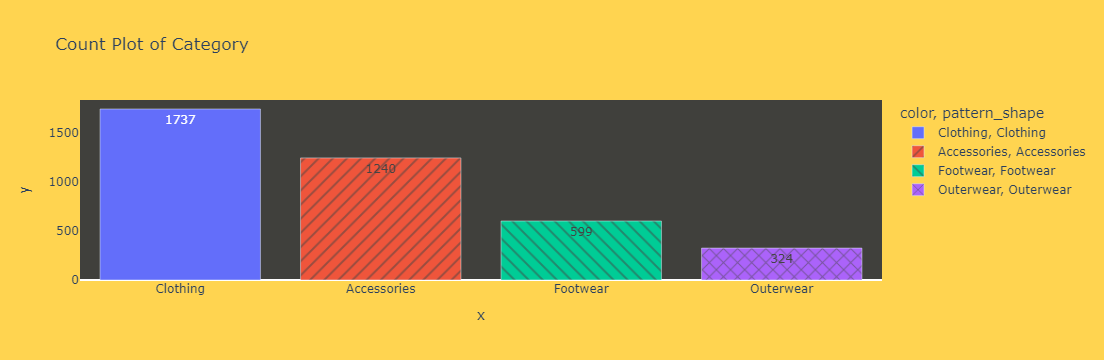

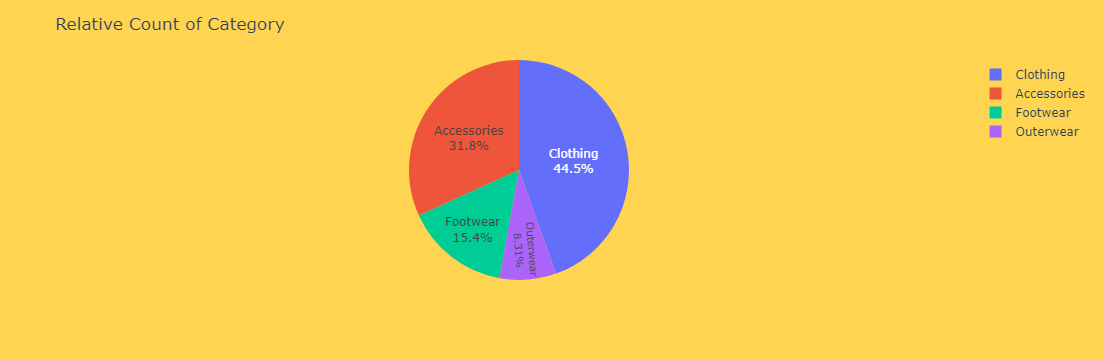

Category contains 0.0 % null values


In [18]:
uni_cat('Category')

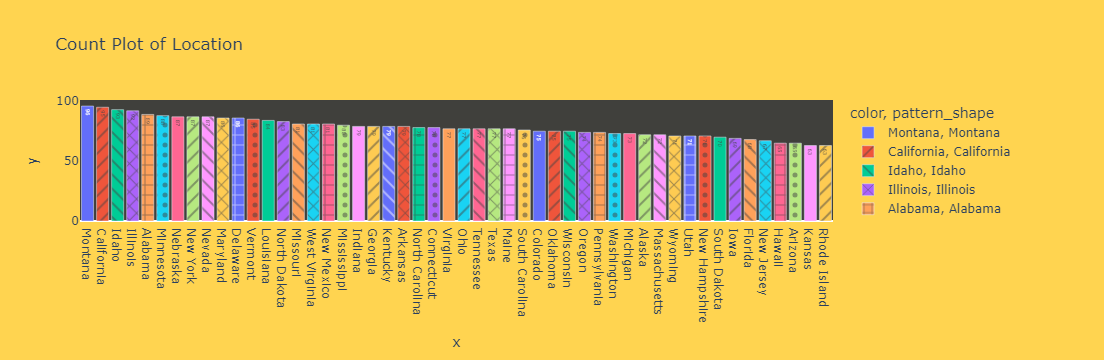

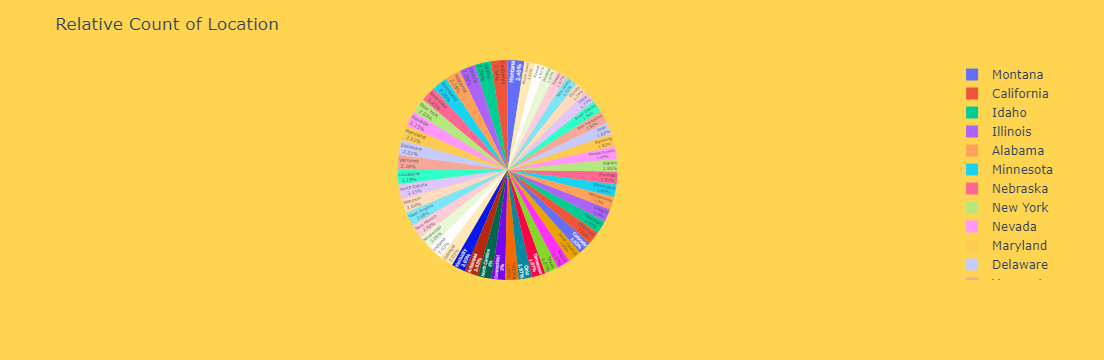

Location contains 0.0 % null values


In [19]:
uni_cat('Location')

In [20]:
uni_cat('Size')

Size contains 0.0 % null values


In [21]:
uni_cat('Color')

Color contains 0.0 % null values


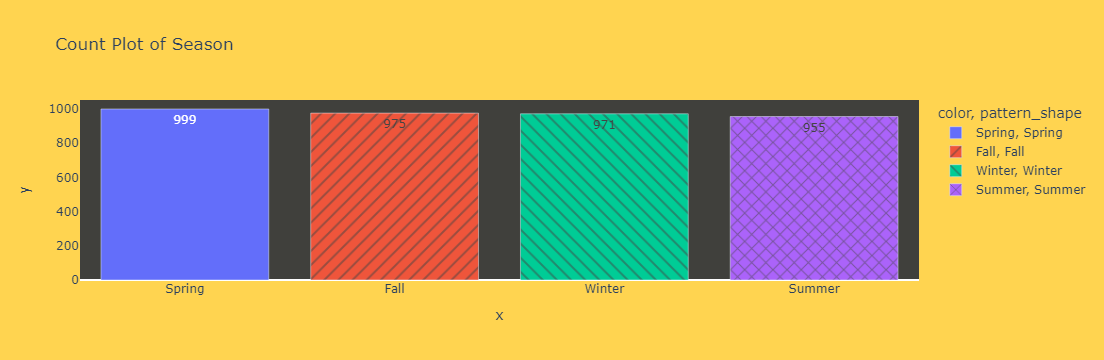

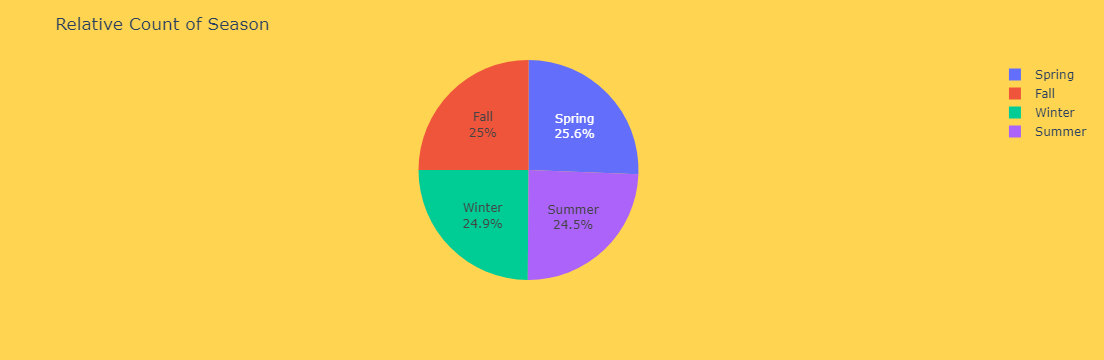

Season contains 0.0 % null values


In [22]:
uni_cat('Season')


# Gender


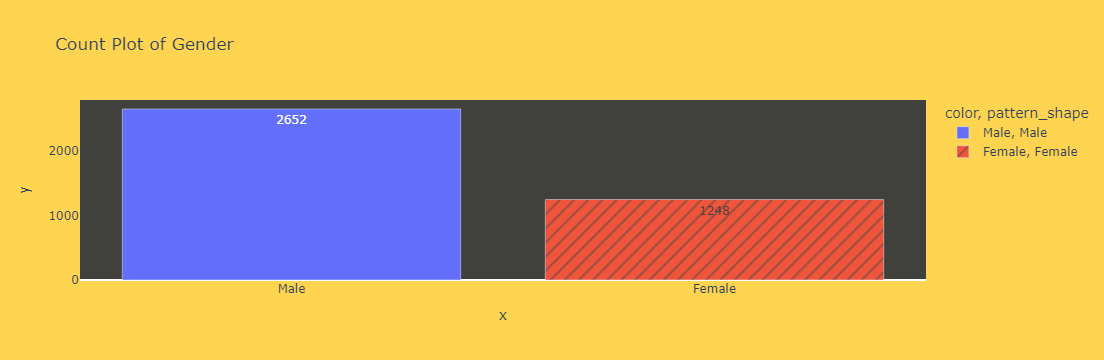

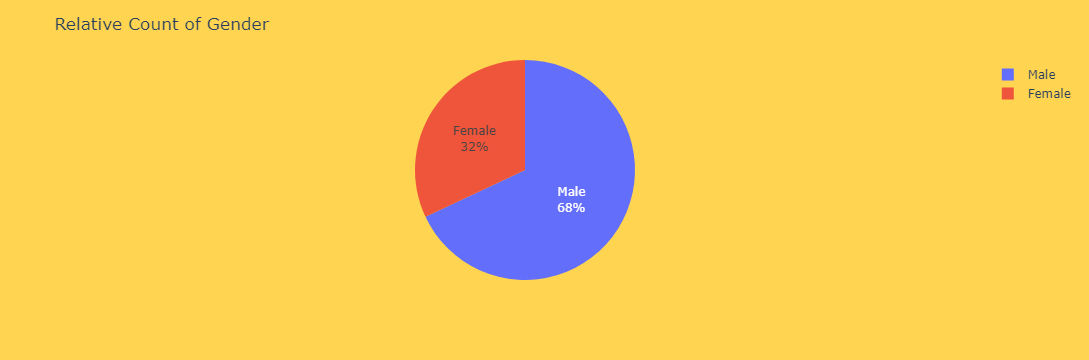

Gender contains 0.0 % null values

# Item Purchased


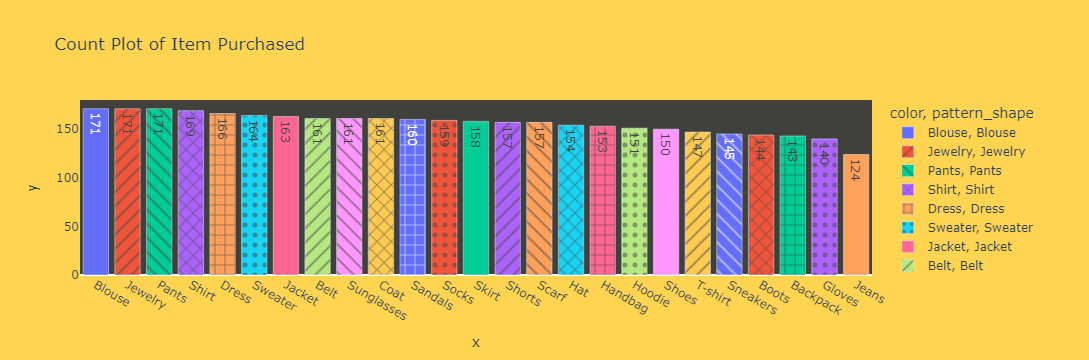

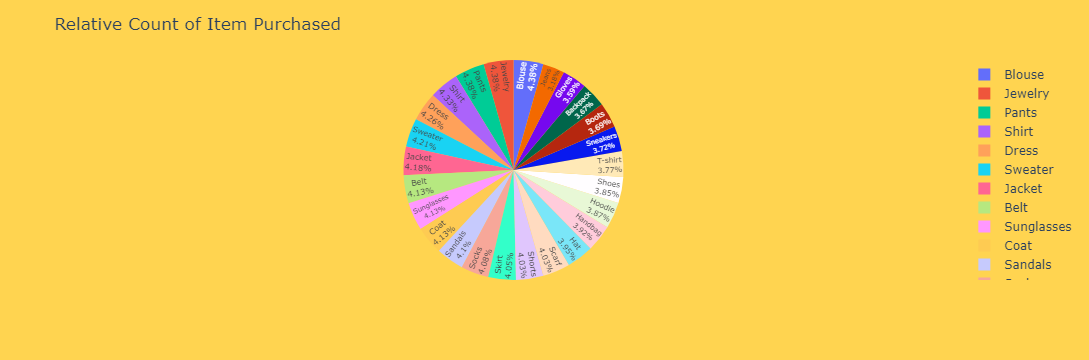

Item Purchased contains 0.0 % null values

# Category


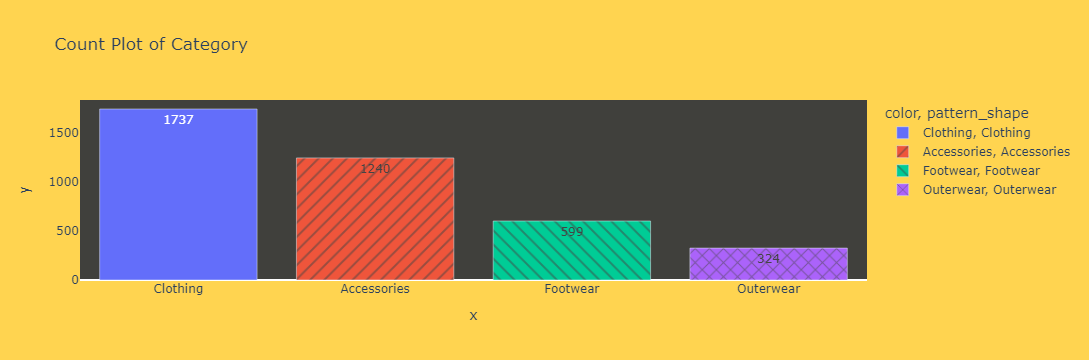

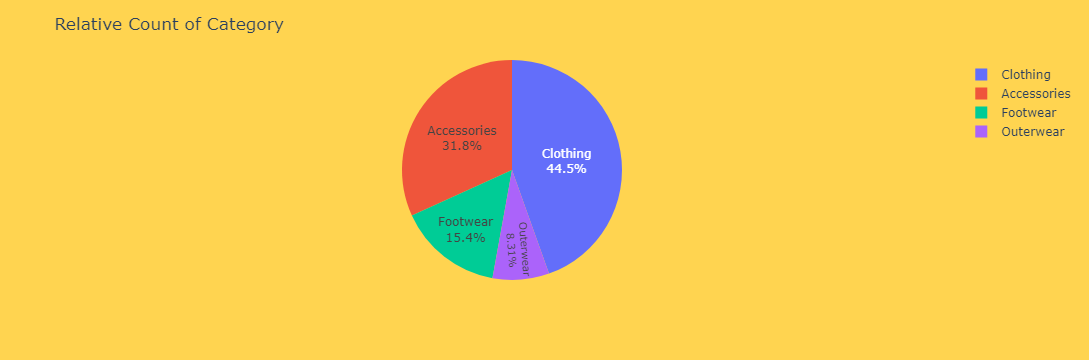

Category contains 0.0 % null values

# Location


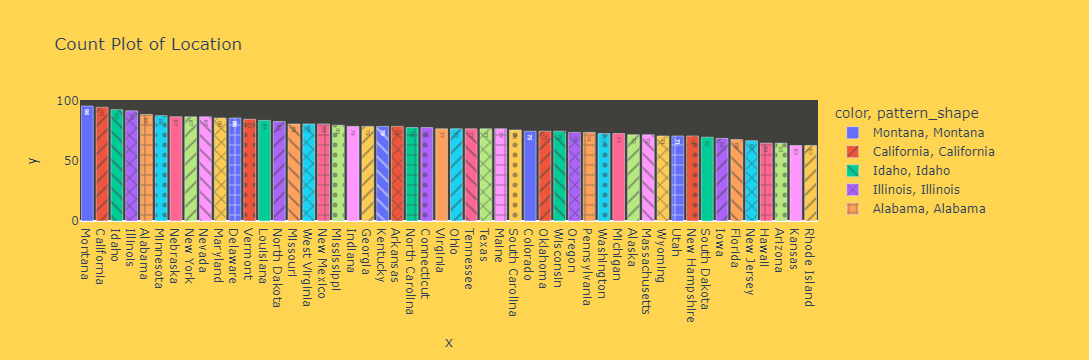

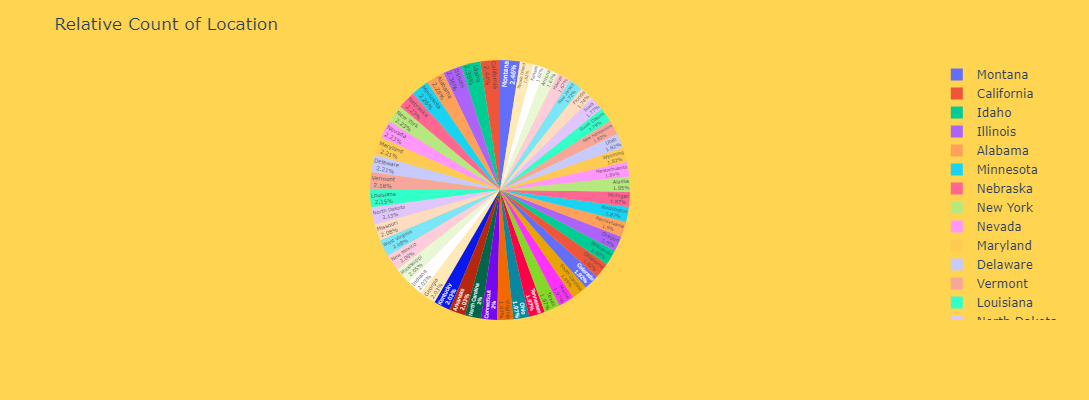

Location contains 0.0 % null values

# Size


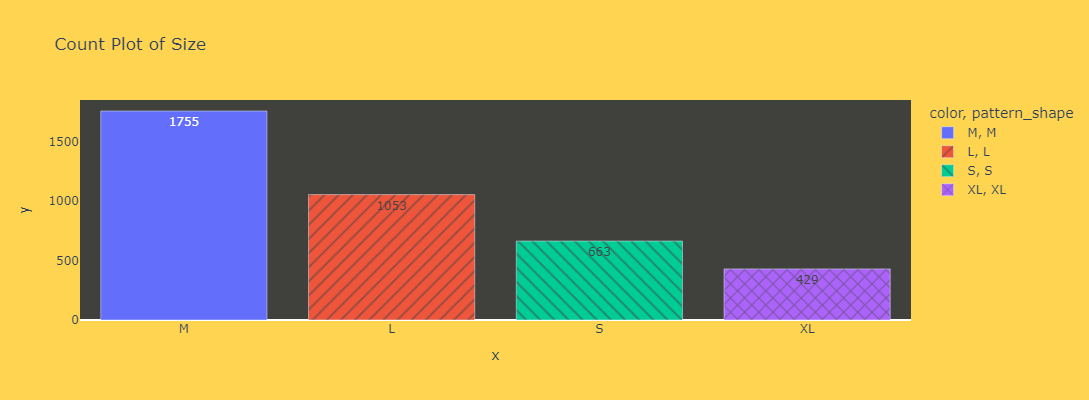

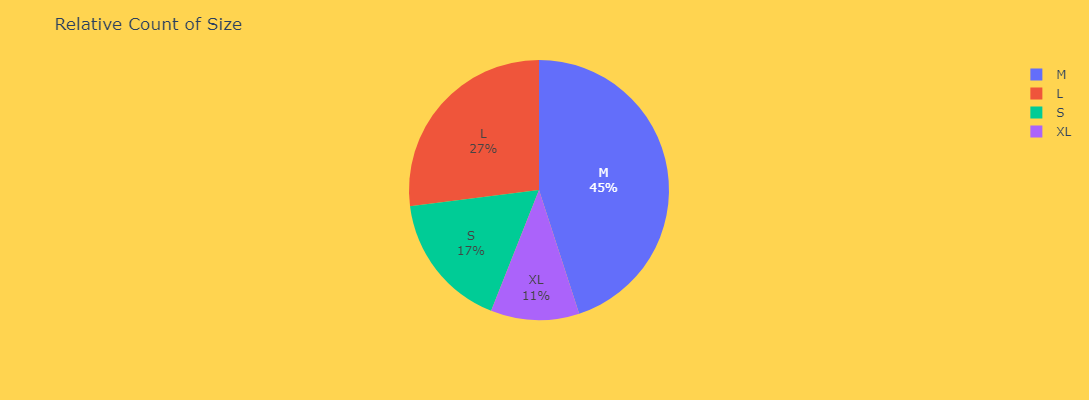

Size contains 0.0 % null values

# Color


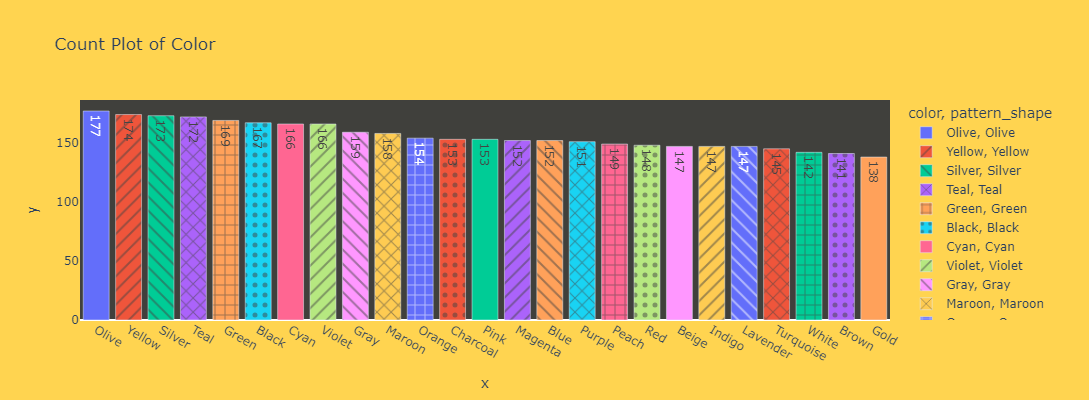

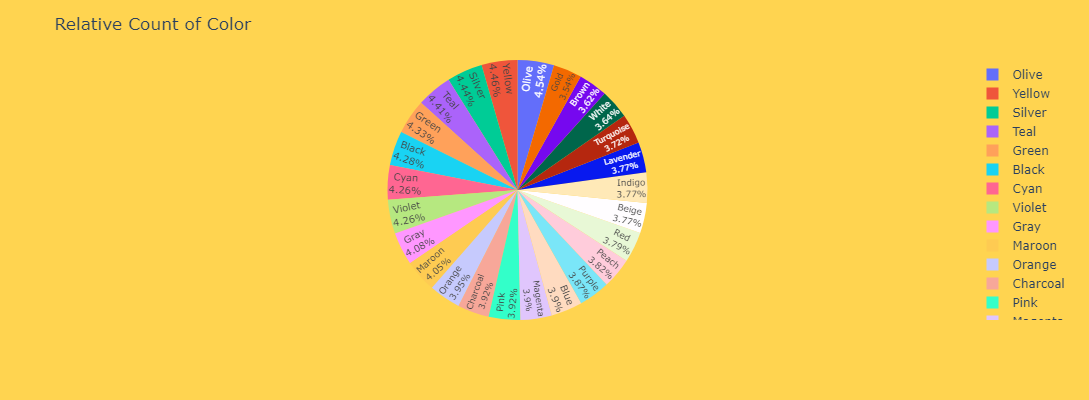

Color contains 0.0 % null values

# Season


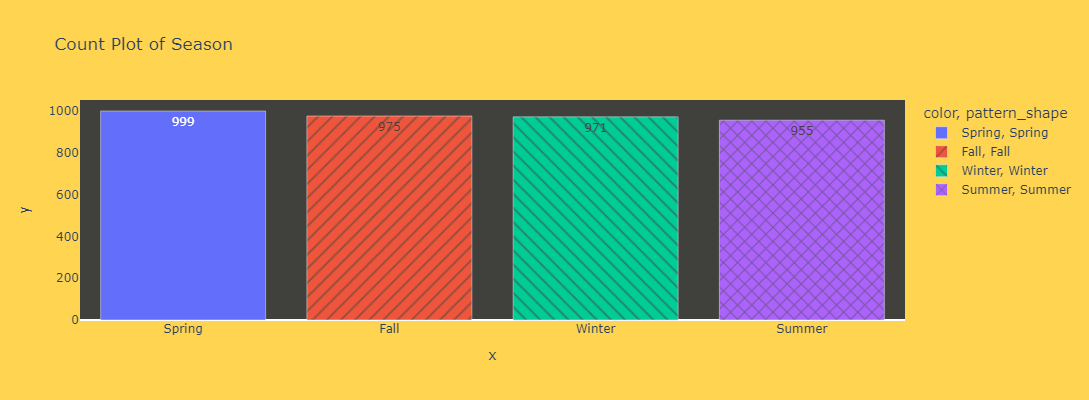

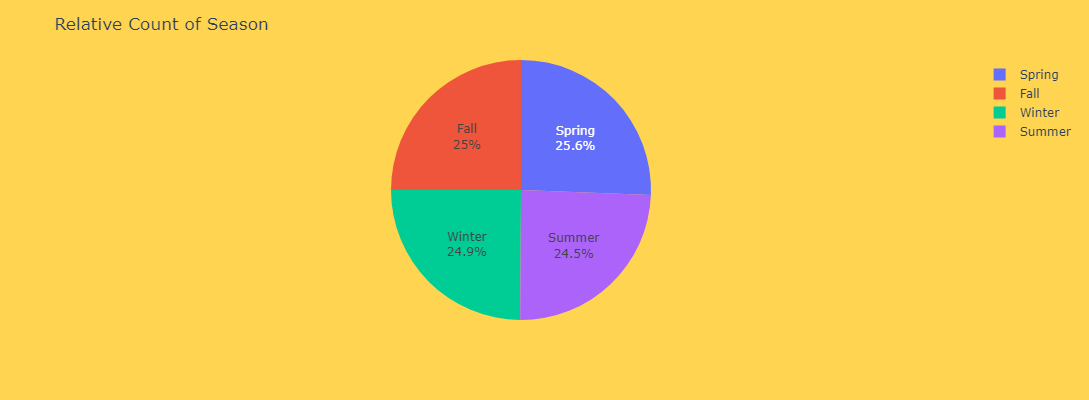

Season contains 0.0 % null values

# Subscription Status


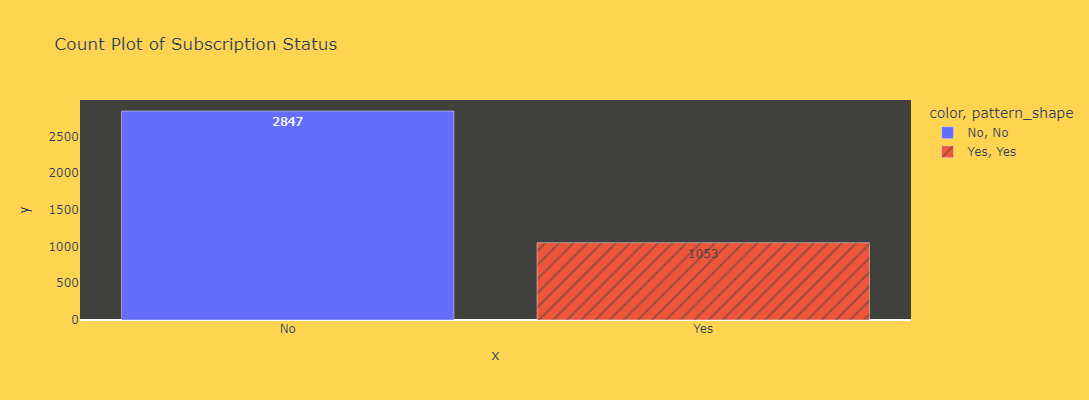

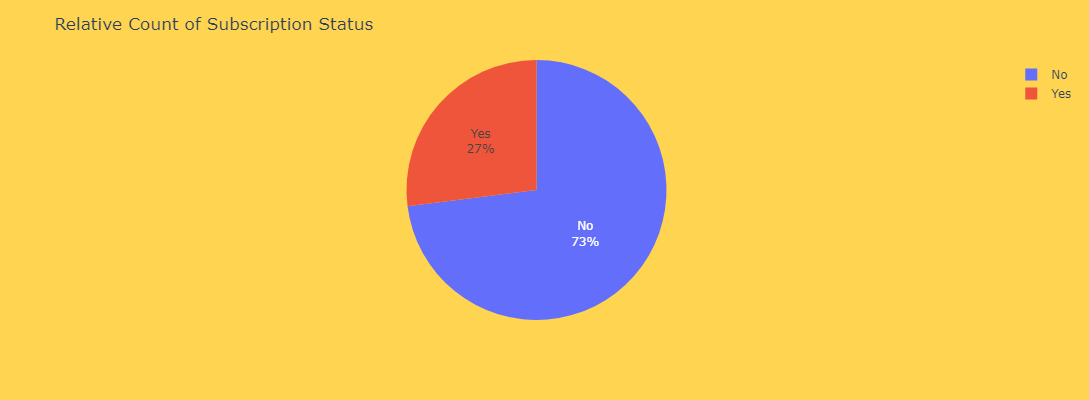

Subscription Status contains 0.0 % null values

# Shipping Type


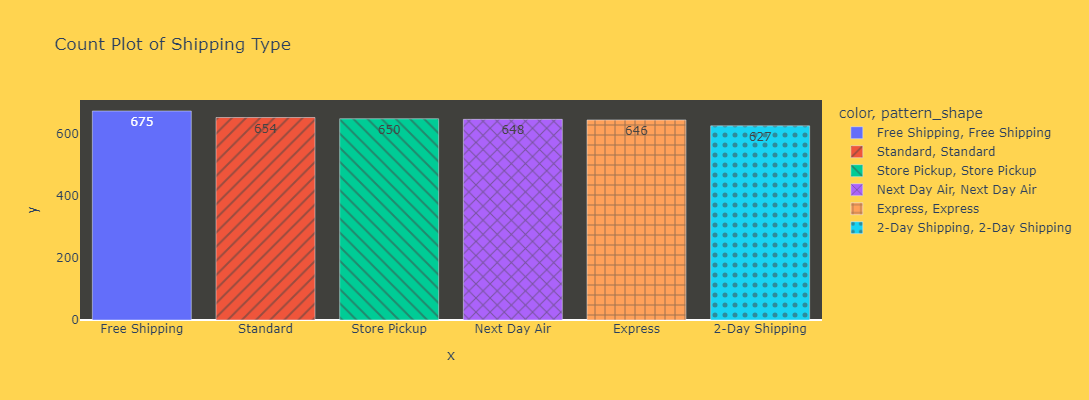

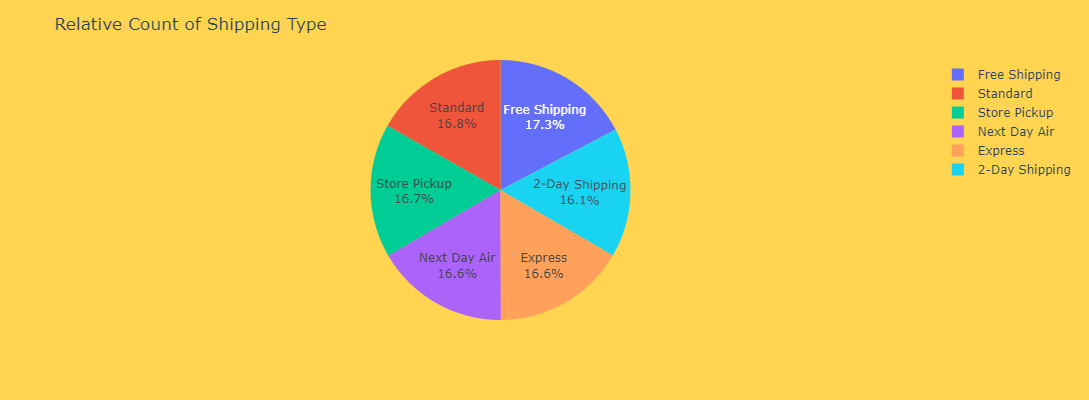

Shipping Type contains 0.0 % null values

# Discount Applied


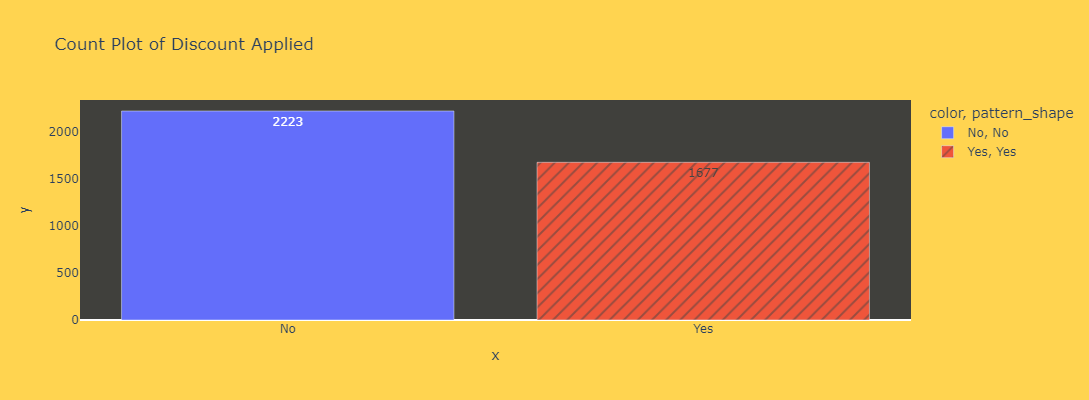

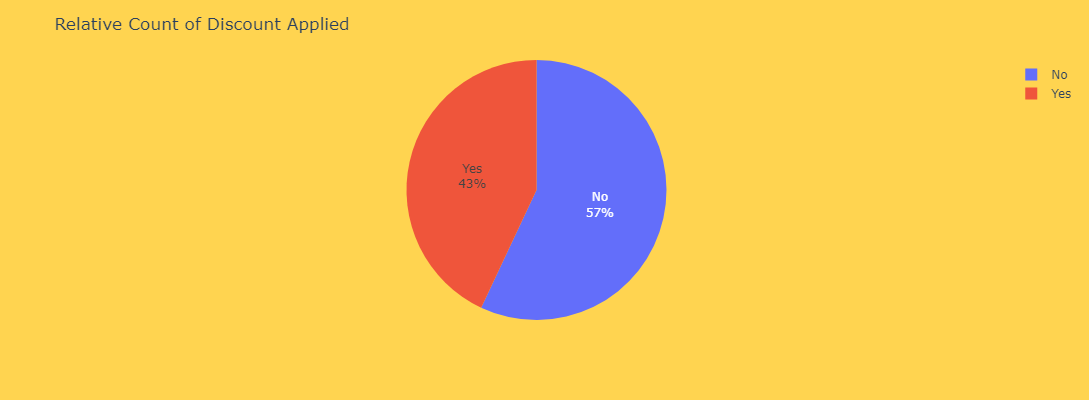

Discount Applied contains 0.0 % null values

# Promo Code Used


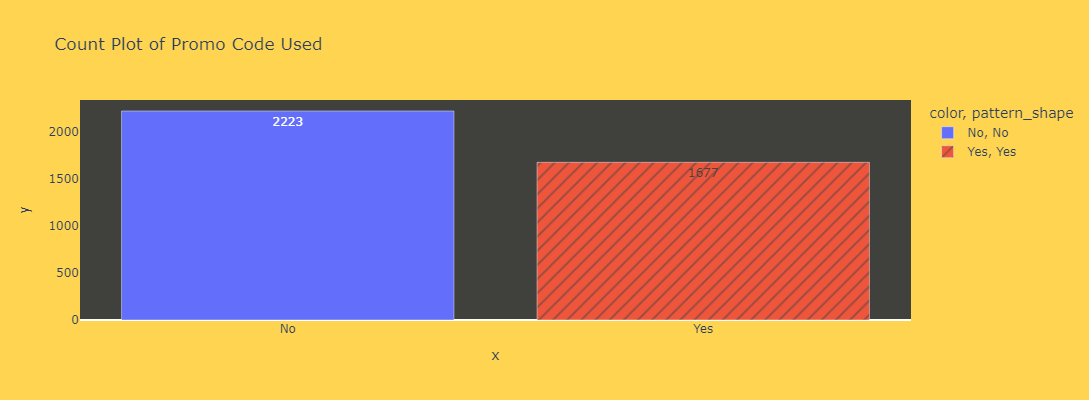

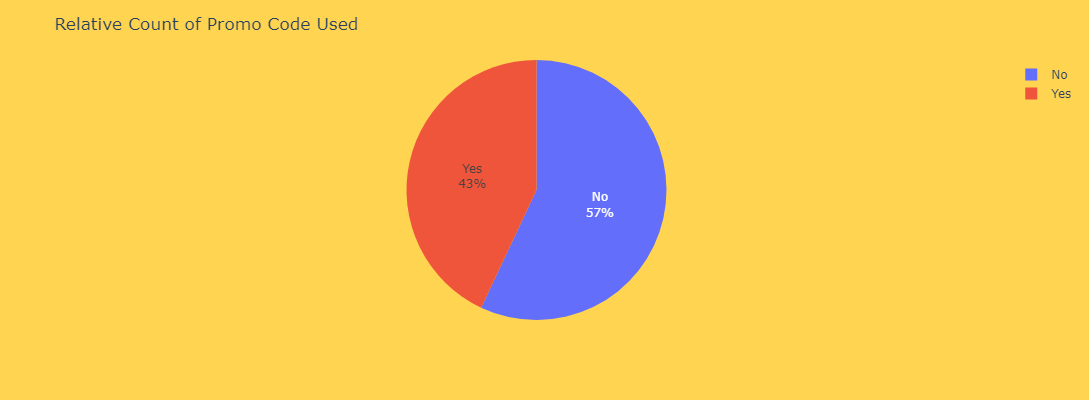

Promo Code Used contains 0.0 % null values

# Payment Method


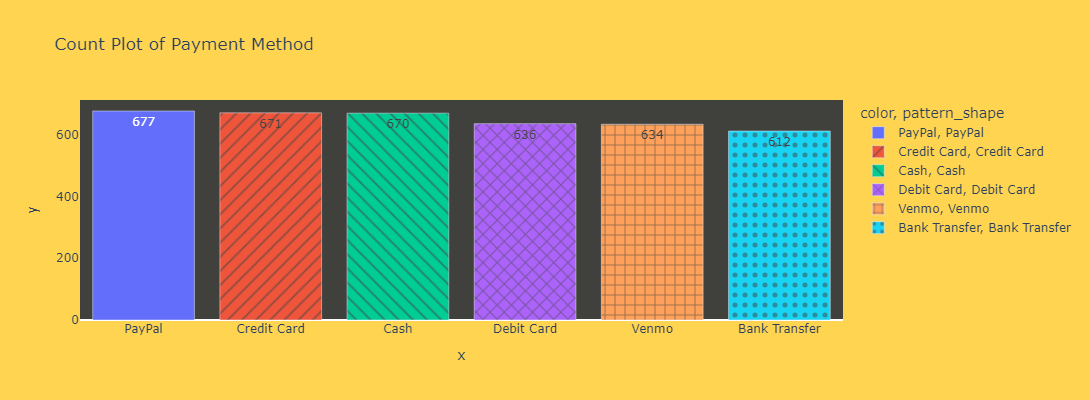

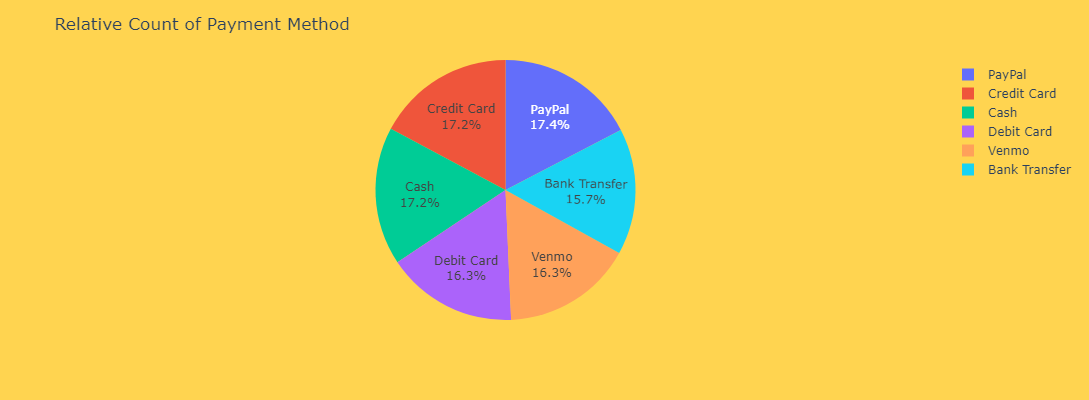

Payment Method contains 0.0 % null values

# Frequency of Purchases


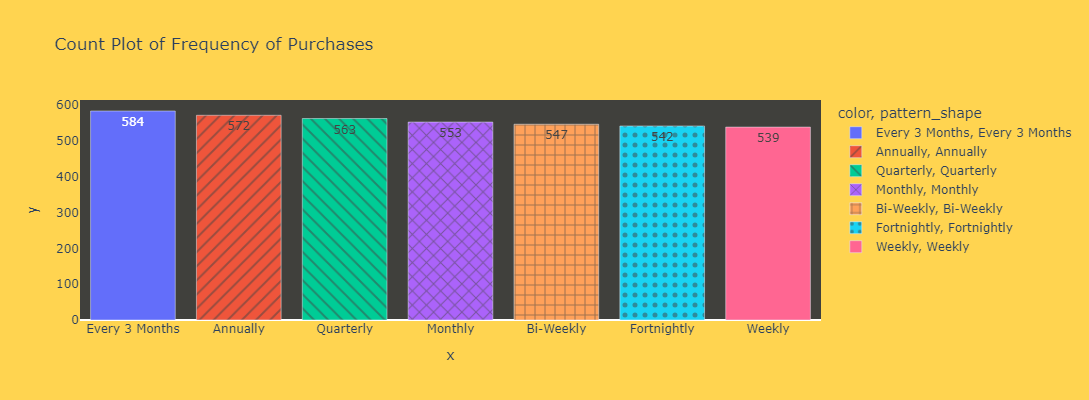

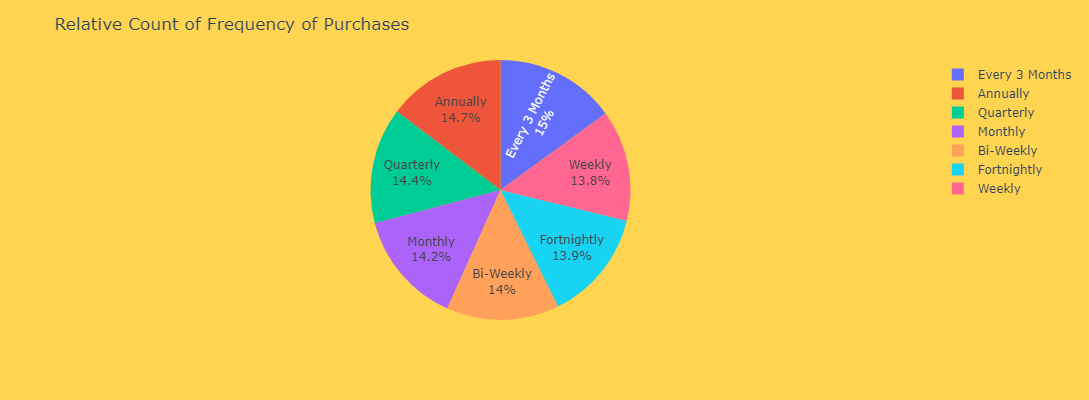

Frequency of Purchases contains 0.0 % null values


In [33]:
# Function to plot categorical column distributions
def uni_cat(col):
    index = data[col].value_counts().index
    value = data[col].value_counts().values

    # Bar Plot
    fig = px.bar(x=index, y=value, pattern_shape=index, text_auto=index, color=index, title=f'Count Plot of {col}')
    fig.update_layout(paper_bgcolor='#FFD450', plot_bgcolor='#40403C', height=400)
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

    # Pie Plot
    fig = px.pie(names=index, values=value, height=400)
    fig.update_layout(paper_bgcolor='#FFD450', title=f'Relative Count of {col}')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

    # Null Values
    print(f"{col} contains {round(data[col].isnull().mean() * 100, 2)} % null values")

# Plotting categorical columns
for col in cat_col:
    print(f"\n# {col}")
    uni_cat(col)


In [34]:
# KMeans Clustering
# Selecting only numerical columns for clustering
data_clustering = data[num_col]


In [35]:
# Standardizing the data for clustering
scaler = StandardScaler()
data_clustering_scaled = scaler.fit_transform(data_clustering)


In [36]:
# Standardizing the data for clustering
scaler = StandardScaler()
data_clustering_scaled = scaler.fit_transform(data_clustering)


In [37]:
# Applying KMeans
# Define the number of clusters, e.g., 3
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_clustering_scaled)

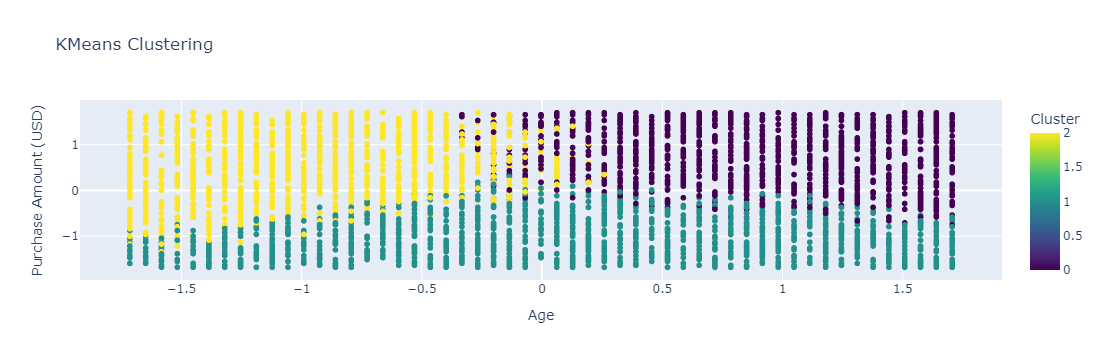

In [39]:
# Visualize Clusters with Scatter Plot
# Choosing the first two numerical columns for visualization purposes
fig = px.scatter(data, x=num_col[0], y=num_col[1], color='Cluster',
                 title="KMeans Clustering",
                 color_continuous_scale=px.colors.sequential.Viridis)
fig.show()



In [40]:
# Additional Analysis - Cluster Centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=num_col)
print("Cluster Centers:\n", cluster_df)

Cluster Centers:
         Age  Purchase Amount (USD)  Review Rating  Previous Purchases
0  0.868167               0.749409       0.146245            0.140273
1  0.120141              -1.010344      -0.168720            0.018840
2 -0.973268               0.557461       0.073101           -0.156537
